In [33]:
import scipy
from scipy import interpolate
from scipy import stats
from scipy.optimize import least_squares
import matplotlib.pyplot as pl
import matplotlib.animation as animation
import pickle


import numpy as np

%matplotlib inline

In [30]:
# Comsol model of the self heating
model = np.loadtxt('1W_self_heating_defocus_doublepass.txt')

infile = open('data.p','rb')
data_p = pickle.load(infile)

In [50]:
1750/20

87

In [55]:
data = data_p[(700,450)]['spherical'][87:-1]

time = np.arange(0.,float(len(data)),1.)

t_vect = (time*20.)

In [56]:
t_vect

array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
        180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
        360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
        540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
        720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
        900.,  920.,  940.,  960.,  980., 1000., 1020., 1040., 1060.,
       1080., 1100., 1120., 1140., 1160., 1180., 1200., 1220., 1240.,
       1260., 1280., 1300., 1320., 1340., 1360., 1380., 1400., 1420.,
       1440., 1460., 1480., 1500., 1520., 1540., 1560., 1580., 1600.,
       1620., 1640., 1660., 1680., 1700., 1720., 1740., 1760., 1780.,
       1800., 1820., 1840., 1860., 1880., 1900., 1920., 1940., 1960.,
       1980., 2000., 2020., 2040., 2060., 2080., 2100., 2120., 2140.,
       2160., 2180., 2200., 2220., 2240., 2260., 2280., 2300., 2320.])

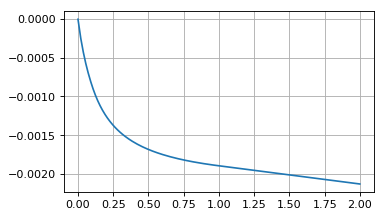

In [52]:
time_model = model[:,0]
abs_model  = model[:,1]

def TL(x,a,b):    
    y = interpolate.interp1d(time_model,-abs_model/1e6,fill_value="extrapolate")
    ynew = y(x)
    return a + (b * ynew)

a=0.0
b=2.0
x = np.arange(0,2,.001) #hours
f = TL(x,a,b)

#### Plot
pl.figure(figsize=(5, 3), dpi=80)
pl.plot(x,f)
pl.grid()
pl.show()

p_in=17.0
prc_g = 45.0
bs = 0.5
arm_g = 282.0

p_arm = p_in*prc_g*bs*arm_g

#s_indx = 0 + (50*30) #choose a start time a little bit after power down to get a quieter time after lockloss
#e_indx = s_indx + 1*60*45*16  #convert index to seconds (1hour)

s_indx = 0
e_indx = len(t_vect)

def get_abs(data,opticname):
    
    time_ix = t_vect[s_indx:e_indx] - t_vect[s_indx]
    data_ix = data[s_indx:e_indx] - data[s_indx]

    time_ix = time_ix/3600
    
    data_start_avg = np.average(data_ix[0:100])#rescale start to zero, guess
    data_ix = data_ix - data_start_avg
    
    [opt,b]=scipy.optimize.curve_fit(TL,time_ix,data_ix)

    arm_abs = 1e9*opt[1]/p_arm #scale to get the absorption in ppm
    print(arm_abs)
    perr = np.sqrt(np.diag(b))
    print(perr)
    
    res = TL(time_ix,opt[0],opt[1])-data_ix
    
    [opt,b]=scipy.optimize.curve_fit(TL,time_ix,data_ix,sigma=1/res)
    
    pl.figure(figsize=(10, 8), dpi=80)
    pl.subplot(211)
    pl.plot(time_ix,data_ix*1e6,label="Data")
    #pl.plot(time_ix,res*1e6,label="Residuals")
    pl.plot(time_ix,TL(time_ix,opt[0],opt[1])*1e6,label="Comsol Model",linewidth=3.0)
    pl.ylabel("Spherical Power (uDiopters)")
    pl.xlabel("Time After Lockloss (Hours)")
    pl.legend()
    #pl.title(opticname + " Abs Estimate = "+str(round(arm_abs,2))+"+/-"+str(round(1e9*rms/p_arm,2)) + "ppb")
    pl.grid()
    
    pl.show()


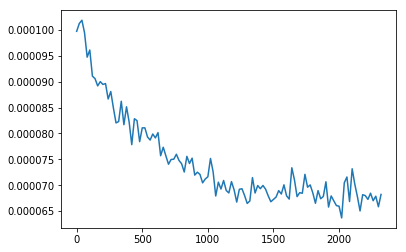

In [57]:
fig = pl.figure()

ax = fig.add_subplot(111)

ax.plot(t_vect,data)

358.24489856382064
[6.11148271e-07 8.68748874e-04]


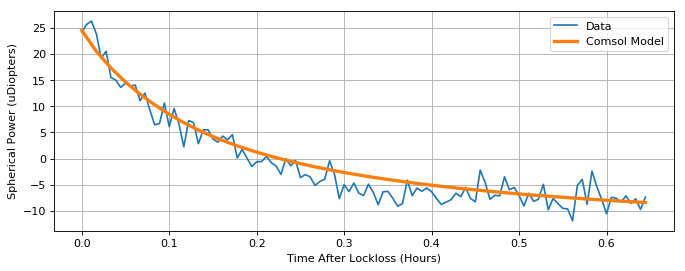

In [59]:
get_abs(data,'itmx')